In [1]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import warnings

%matplotlib inline
%load_ext autoreload
%autoreload 2

# plt.rc('font', size=50)
# plt.rcParams.update({'font.size': 14})
warnings.filterwarnings('ignore')

# Number of Rules Per Pop Percentage

In [ ]:
from MetricCalculation import Coverage as cov

In [82]:
# ICU

clientDF = cov.loadClientRules(8000, "../Data/ICU/Best/", cutoff=0.0)
print("CLIENT DF", clientDF)


File not found for Client 8
File not found for Client 81
File not found for Client 230
File not found for Client 252
File not found for Client 283
File not found for Client 335
File not found for Client 337
File not found for Client 342
File not found for Client 366
File not found for Client 531
File not found for Client 609
File not found for Client 639
File not found for Client 696
File not found for Client 727
File not found for Client 730
File not found for Client 755
File not found for Client 774
File not found for Client 963
File not found for Client 987
File not found for Client 1018
File not found for Client 1080
File not found for Client 1082
File not found for Client 1252
File not found for Client 1352
File not found for Client 1382
File not found for Client 1432
File not found for Client 1534
File not found for Client 1564
File not found for Client 1600
File not found for Client 1629
File not found for Client 1747
File not found for Client 1985
File not found for Client 2026

In [115]:
cutoff = 0

cdf = clientDF[clientDF['Percent of Population'] > cutoff]
clientRules = cdf['Rule'].tolist()
print("Total Client Rules", len(clientDF))
print("Total Client Rules at Cutoff Thresh", len(cdf))

Total Client Rules 34208
Total Client Rules at Cutoff Thresh 34208


In [ ]:
# Sepsis
clientDF = cov.loadClientRules(40336, "../Data/Sepsis/Best/", cutoff=0.0)
print("CLIENT DF", clientDF)

In [ ]:
prcnts = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
sepsis_nrules = []
for cutoff in prcnts:

    cdf = clientDF[clientDF['Percent of Population'] > cutoff]
    clientRules = cdf['Rule'].tolist()
    print("\nCutoff",cutoff)
    print("Total Client Rules", len(clientDF))
    print("Total Client Rules at Cutoff Thresh", len(cdf))
    
    sepsis_nrules.append(len(cdf))
    
sepsis_nrules

In [ ]:
# T1D
clientDF = cov.loadClientRules(34013, "../Data/T1D/Best/", cutoff=0.0)
print("CLIENT DF", clientDF)

In [ ]:
prcnts = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
t1d_nrules = []
for cutoff in prcnts:

    cdf = clientDF[clientDF['Percent of Population'] > cutoff]
    clientRules = cdf['Rule'].tolist()
    print("\nCutoff",cutoff)
    print("Total Client Rules", len(clientDF))
    print("Total Client Rules at Cutoff Thresh", len(cdf))
    
    t1d_nrules.append(len(cdf))
    
t1d_nrules

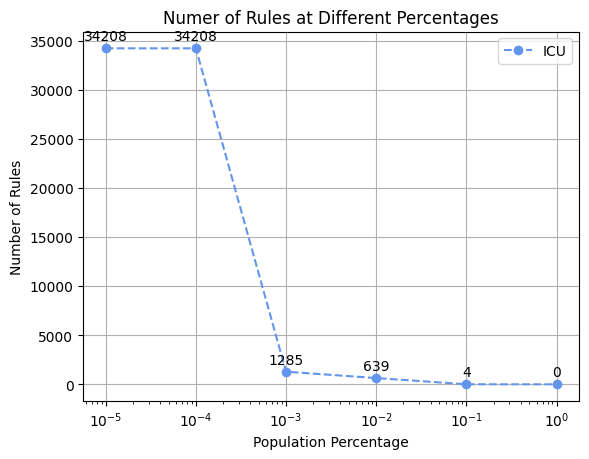

In [17]:
# Rule Breakdown
prcnts = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
icu_nrules = [34208, 34208, 1285, 639, 4, 0]
# sepsis_nrules = ?
# t1d_nrules = ?

fig, ax = plt.subplots()
b_color = 'cornflowerblue'
a_color = 'crimson' #'crimson' 'tomato' 'lightcoral' 'r'

plt.plot(prcnts, icu_nrules, 'o--', color='cornflowerblue', label="ICU")
# plt.plot(prcnts, sepsis_nrules, 'o--', color='crimson', label="Sepsis")
# plt.plot(prcnts, t1d_nrules, 'o--', color='mediumseagreen', label="T1D")

# Plot values for each tick
for i in range(len(prcnts)):
#     ax.annotate(str(icu_nrules[i]), xy=(prcnts[i], icu_nrules[i] + 500))
    ax.text(prcnts[i], icu_nrules[i] + 500, str(icu_nrules[i]), ha='center', va='bottom')

ax.set_ylabel('Number of Rules')
ax.set_xlabel("Population Percentage")
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(0, 36000)

ax.set_title('Numer of Rules at Different Percentages')
ax.legend()
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

# Coverage

## Test Exp for ICU


In [40]:
# Coverage

eps = [0.01, 0.1, 1, 10, 100, 1000, 10000]

#Baseline
base_cov = np.array([0.0165517241, 0.0172413793, 0.0175862069, 0.175862069, 0.2, 0.286206897])
base_cov_stds = np.array([0.013793103, 0.037773969, 0.039164885, 0.036001057, 0.055172414, 0.074677268])

base_prec = np.array([0.630516507,0.679079386,0.682779394,0.692944407, 0.69716005, 0.709145596])
base_prec_stds = np.array([0.023909371,0.024394823,0.024188198, 0.027066528,0.03260531, 0.031205005])

# Adaptive
covs = np.array([0.01, 0.1, 1, 10, 100, 1000, 1])
cov_stds = np.array([0.016893033, 0.090971765, 0.031034483, 0.039164885,   0.058213597, 0.115401383 0])

prec = np.array([0.01, 0.1, 1, 10, 100, 1000, 1])
prec_stds = np.array([0.022902747, 0.02938773, 0.028979768, 0.021005668, 0.027866364, 0.012734432, 0])



# Build the plot
fig, ax = plt.subplots()
x = np.arange(len(eps))
b_color = 'cornflowerblue'
a_color = 'crimson' #'crimson' 'tomato' 'lightcoral' 'r'

plt.plot(x, base_prec, 'o--', color=b_color, label="Baseline Precision")
plt.fill_between(x, base_prec-base_prec_stds, base_prec+base_prec_stds, color=b_color, alpha=0.2)
plt.plot(x, prec, 'o--', color=a_color , label="Adaptive Precision")
plt.fill_between(x, prec-prec_stds, prec+prec_stds, color=a_color , alpha=0.2)

plt.plot(x, base_cov, 'o-', color=b_color, label="Baseline Coverage")
plt.fill_between(x, base_cov-base_cov_stds, base_cov+base_cov_stds, color=b_color, alpha=0.2)
plt.plot(x, covs, 'o-', color=a_color , label="Adaptive Coverage")
plt.fill_between(x, covs-cov_stds, covs+cov_stds, color=a_color , alpha=0.2)


ax.set_ylabel('Percentage')
ax.set_xlabel("Epsilon")
ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(eps)
ax.set_title('Coverage Results - ICU Dataset, V=1%')
ax.legend()
ax.yaxis.grid(True)
plt.show()

SyntaxError: invalid syntax (946548834.py, line 14)

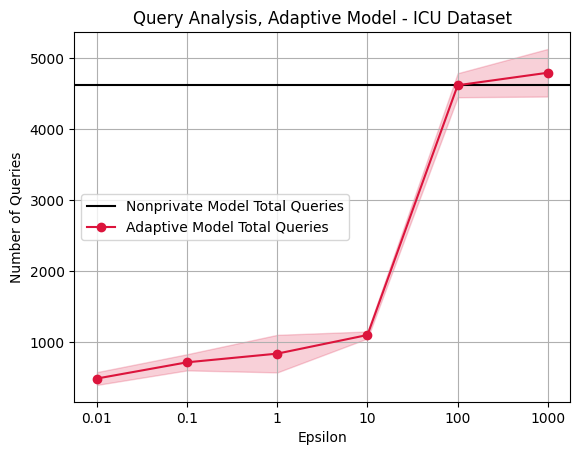

In [6]:
# Query Analysis

queries = np.array([492, 720, 842, 1104, 4615, 4791])
quers_std = np.array([0.9, 1.135781669, 2.638181192, 0.489897949, 1.688194302, 3.346640106]) 
quers_std = [x * 100 for x in quers_std]

fig, ax = plt.subplots()
x = np.arange(len(eps))
b_color = 'cornflowerblue'
a_color = 'crimson' #'crimson' 'tomato' 'lightcoral' 'r'

#nonprive ground truth number of queries
ax.axhline(y=4620, color='k', label='Nonprivate Model Total Queries')

#plot model queries
plt.plot(x, queries, 'o-', color=a_color, label="Adaptive Model Total Queries")
plt.fill_between(x, queries-quers_std, queries+quers_std, color=a_color, alpha=0.2)

ax.set_ylabel('Number of Queries')
ax.set_xlabel("Epsilon")
# ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(eps)
ax.set_title('Query Analysis, Adaptive Model - ICU Dataset')
ax.legend()
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

## Original code with example

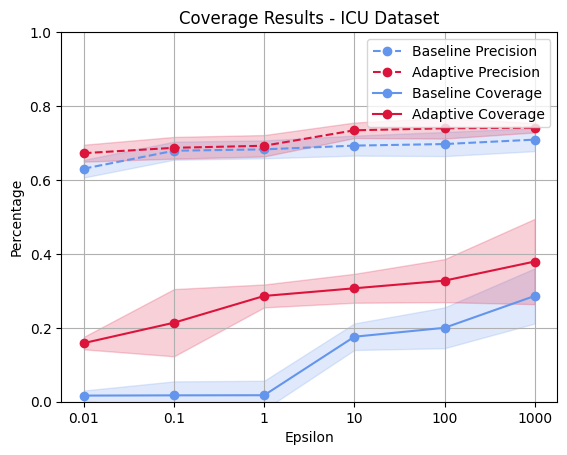

In [4]:
# Graphs
eps = [0.01, 0.1, 1, 10, 100, 1000]


#Baseline
base_cov = np.array([0.0165517241, 0.0172413793, 0.0175862069, 0.175862069, 0.2, 0.286206897])
base_cov_stds = np.array([0.013793103, 0.037773969, 0.039164885, 0.036001057, 0.055172414, 0.074677268])

base_prec = np.array([0.630516507,0.679079386,0.682779394,0.692944407, 0.69716005, 0.709145596])
base_prec_stds = np.array([0.023909371,0.024394823,0.024188198, 0.027066528,0.03260531, 0.031205005])

# Adaptive
covs = np.array([0.15862069, 0.213793103, 0.286206897, 0.306896552,   0.327586207, 0.379310345])
cov_stds = np.array([0.016893033, 0.090971765, 0.031034483, 0.039164885,   0.058213597, 0.115401383])

prec = np.array([0.672485669, 0.68702724, 0.692574686, 0.734376115, 0.739805989, 0.741285464])
prec_stds = np.array([0.022902747, 0.02938773, 0.028979768, 0.021005668, 0.027866364, 0.012734432])



# Build the plot
fig, ax = plt.subplots()
x = np.arange(len(eps))
b_color = 'cornflowerblue'
a_color = 'crimson' #'crimson' 'tomato' 'lightcoral' 'r'

plt.plot(x, base_prec, 'o--', color=b_color, label="Baseline Precision")
plt.fill_between(x, base_prec-base_prec_stds, base_prec+base_prec_stds, color=b_color, alpha=0.2)
plt.plot(x, prec, 'o--', color=a_color , label="Adaptive Precision")
plt.fill_between(x, prec-prec_stds, prec+prec_stds, color=a_color , alpha=0.2)

plt.plot(x, base_cov, 'o-', color=b_color, label="Baseline Coverage")
plt.fill_between(x, base_cov-base_cov_stds, base_cov+base_cov_stds, color=b_color, alpha=0.2)
plt.plot(x, covs, 'o-', color=a_color , label="Adaptive Coverage")
plt.fill_between(x, covs-cov_stds, covs+cov_stds, color=a_color , alpha=0.2)


ax.set_ylabel('Percentage')
ax.set_xlabel("Epsilon")
ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xticklabels(eps)
ax.set_title('Coverage Results - ICU Dataset')
ax.legend()
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

In [ ]:
# res for icu 8000 0.1
icu_cov = [?, ]

# --> trying ICU 8000
# eps 0.1; 100% cov and prec


## OLD GRAPHS

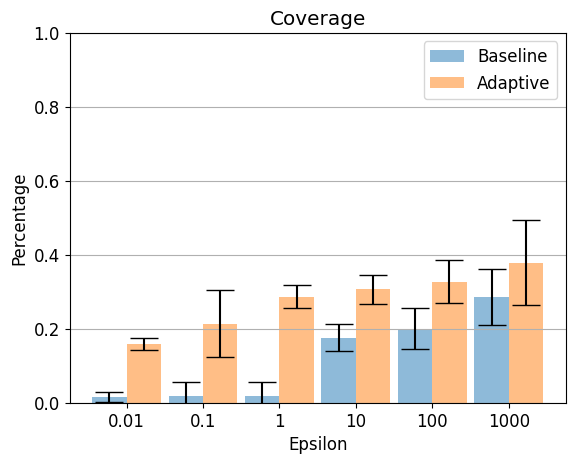

In [42]:
# Coverage Graphs
eps = [0.01, 0.1, 1, 10, 100, 1000]
covs = [0.15862069, 0.213793103, 0.286206897, 0.306896552,   0.327586207, 0.379310345]
cov_stds = [0.016893033, 0.090971765, 0.031034483, 0.039164885,   0.058213597, 0.115401383]

base_cov = [0.0165517241, 0.0172413793, 0.0175862069, 0.175862069, 0.2, 0.286206897]
base_cov_stds = [0.013793103, 0.037773969, 0.039164885, 0.036001057, 0.055172414, 0.074677268]


# Build the plot
fig, ax = plt.subplots()
x_pos = np.arange(len(covs))
width = 0.45
ax.bar(x_pos - width/2, base_cov, width, yerr=base_cov_stds, align='center', alpha=0.5, ecolor='black', capsize=10, label="Baseline")
ax.bar(x_pos + width/2, covs, width, yerr=cov_stds, align='center', alpha=0.5, ecolor='black', capsize=10, label="Adaptive")
ax.set_ylabel('Percentage')
ax.set_xlabel("Epsilon")
ax.set_ylim(0, 1)
ax.set_xticks(x_pos)
ax.set_xticklabels(eps)
ax.set_title('Coverage')
ax.legend()
ax.yaxis.grid(True)
plt.show()

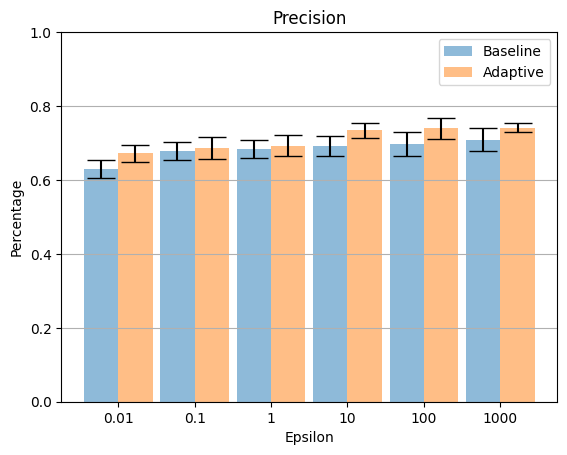

In [4]:
# Precision Graphs
base_prec = [0.630516507,0.679079386,0.682779394,0.692944407, 0.69716005, 0.709145596]
base_prec_stds = [0.023909371,0.024394823,0.024188198, 0.027066528,0.03260531, 0.031205005]

prec = [0.672485669, 0.68702724, 0.692574686, 0.734376115, 0.739805989, 0.741285464]
prec_stds = [0.022902747, 0.02938773, 0.028979768, 0.021005668, 0.027866364, 0.012734432]

# Build the plot
fig, ax = plt.subplots()
x_pos = np.arange(len(covs))
width = 0.45
ax.bar(x_pos - width/2, base_prec, width, yerr=base_prec_stds, align='center', alpha=0.5, ecolor='black', capsize=10, label="Baseline")
ax.bar(x_pos + width/2, prec, width, yerr=prec_stds, align='center', alpha=0.5, ecolor='black', capsize=10, label="Adaptive")
ax.set_ylabel('Percentage')
ax.set_xlabel("Epsilon")
ax.set_ylim(0, 1)
ax.set_xticks(x_pos)
ax.set_xticklabels(eps)
ax.set_title('Precision')
ax.legend()
ax.yaxis.grid(True)
plt.show()

In [ ]:
# Code to plot set of plots

fig = plt.figure(figsize=(14, 10))

grid = plt.GridSpec(2, 3, wspace = .25, hspace = .25)
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

plt.subplot(grid[0, :])
trace = egv.loc[0]
# trace1 = egv.loc[6]
# trace1 = egv.loc[8]
trace1 = egv.loc[9]
# trace2 = egv.loc[26]
# trace2 = egv.loc[28]
trace2 = egv.loc[38]
# trace3 = egv.loc[41]
# trace3 = egv.loc[43] #41 - 43 pretty good
# trace3 = egv.loc[52]
# trace3 = egv.loc[56]
# trace3 = egv.loc[58]
# trace3 = egv.loc[64]
# trace3 = egv.loc[70]
# trace3 = egv.loc[71] # high peak
trace3 = egv.loc[92]
time = range(len(trace))
plt.plot(time, trace, label='Patient 0')
plt.plot(time, trace1, label='Patient 1')
plt.plot(time, trace2, label='Patient 2')
plt.plot(time, trace3, label='Patient 3')
plt.xlabel("Time")
plt.ylabel("Glucose (mg/dL)")
plt.ylim(40, 410)
plt.legend()
plt.title("Sample Glucose Traces")

plt.subplot(grid[1, 0])
# m1 = egv.loc[71][170:210] # high peak
m1 = egv.loc[86][70:120]
time = range(len(m1))
plt.plot(time, m1, color="k")
plt.xlabel("Timesteps")
plt.ylabel("Glucose (mg/dL)")
plt.ylim(40, 410)
plt.title("Motif 0: High Peak")

plt.subplot(grid[1, 1])

m2 = egv.loc[44][110:160] # large drop
# m2 = egv.loc[63][32:72] # large drop
time = range(len(m2))
plt.plot(time, m2, color="k")
plt.xlabel("Timesteps")
plt.ylabel("Glucose (mg/dL)")
plt.ylim(40, 410)
plt.title("Motif 1: Deep Trough")

plt.subplot(grid[1, 2])
m3 = egv.loc[93][110:160] # stable in control
time = range(len(m3))
plt.plot(time, m3, color="k")
plt.xlabel("Timesteps")
plt.ylabel("Glucose (mg/dL)")
plt.ylim(40, 410)
plt.title("Motif 2: Stable Line")

fig.tight_layout()
fig.savefig("Figures/SampleTracesMotifs.png", bbox_inches='tight', dpi=300)

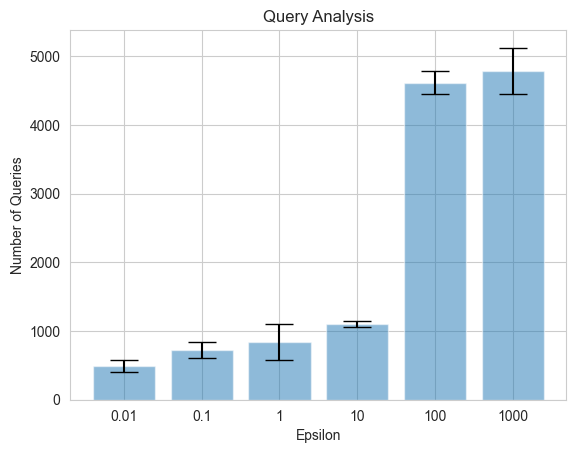

In [64]:
# Query Analysis- May not need

queries = [492, 720, 842, 1104, 4615, 4791]
quers_std = [0.9, 1.135781669, 2.638181192, 0.489897949, 1.688194302, 3.346640106] 
quers_std = [x * 100 for x in quers_std]

# Build the plot
fig, ax = plt.subplots()
x_pos = np.arange(len(covs))
ax.bar(x_pos, queries, yerr=quers_std, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Number of Queries')
ax.set_xlabel("Epsilon")
ax.set_xticks(x_pos)
ax.set_xticklabels(eps)
ax.set_title('Query Analysis')
ax.yaxis.grid(True)
plt.show()